In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("HistoricalPrices.csv")
df.columns

Index(['Date', ' Open', ' High', ' Low', ' Close', ' Volume'], dtype='object')

In [2]:
df.describe()

,Open,High,Low,Close,Volume
count,769.000000,769.000000,769.000000,769.000000,7.690000e+02
mean,21.020481,21.282185,20.611183,20.876918,7.374506e+06
std,7.345341,7.415280,7.235834,7.310708,1.239129e+07
min,11.650000,12.000000,11.500000,11.650000,1.531000e+05
25%,15.300000,15.500000,15.000000,15.100000,1.734900e+06
50%,17.700000,18.000000,17.400000,17.700000,4.225900e+06
75%,25.400000,25.500000,24.850000,25.050000,8.613200e+06
max,40.000000,40.100000,39.550000,40.000000,2.084859e+08


In [3]:
## Data Preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("HistoricalPrices.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as index
df.set_index('Date', inplace=True)

# Sort by date
df = df.sort_index()

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Summary statistics
print(df.describe())

# Display first few rows
print(df.head())


Missing Values:
 Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
             Open        High         Low       Close        Volume
count  769.000000  769.000000  769.000000  769.000000  7.690000e+02
mean    21.020481   21.282185   20.611183   20.876918  7.374506e+06
std      7.345341    7.415280    7.235834    7.310708  1.239129e+07
min     11.650000   12.000000   11.500000   11.650000  1.531000e+05
25%     15.300000   15.500000   15.000000   15.100000  1.734900e+06
50%     17.700000   18.000000   17.400000   17.700000  4.225900e+06
75%     25.400000   25.500000   24.850000   25.050000  8.613200e+06
max     40.000000   40.100000   39.550000   40.000000  2.084859e+08
             Open   High    Low  Close   Volume
Date                                           
2022-01-03  38.00  38.65  37.80  38.15  9414200
2022-01-04  38.75  39.50  38.65  39.05  4115300
2022-01-05  39.00  40.00  39.00  39.55  6747300
2022-01-06  40.00  40.10  39.55  40.00  5136500
2022-01-07

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17844\826168111.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


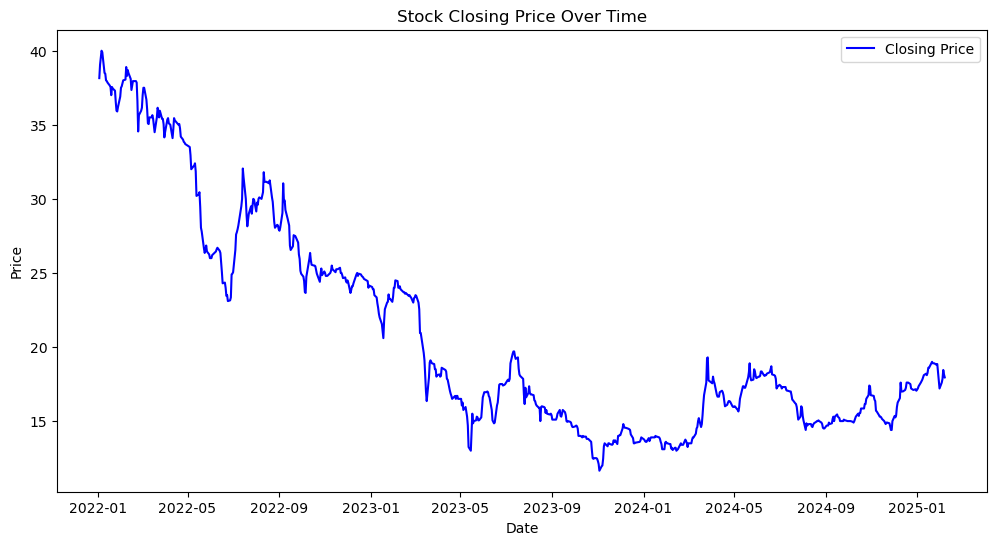

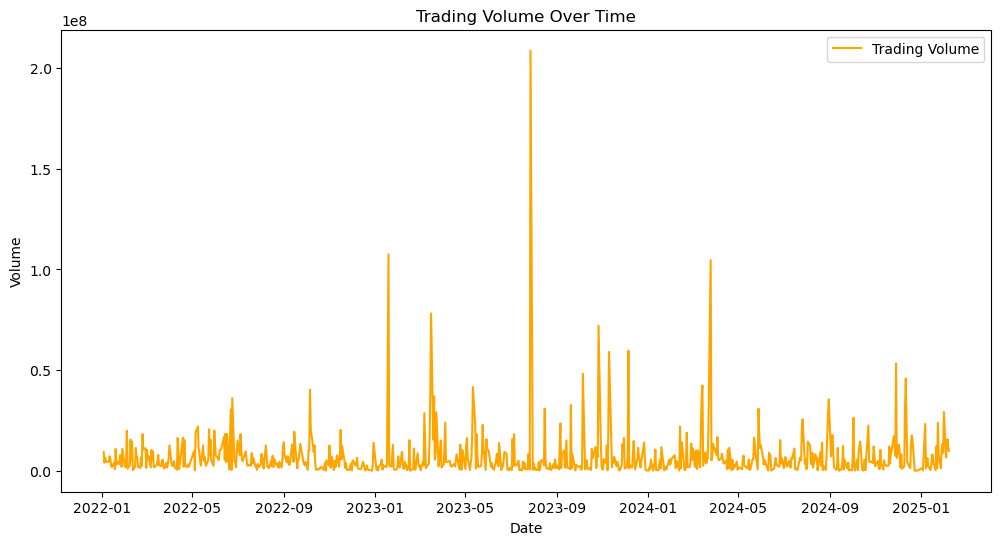

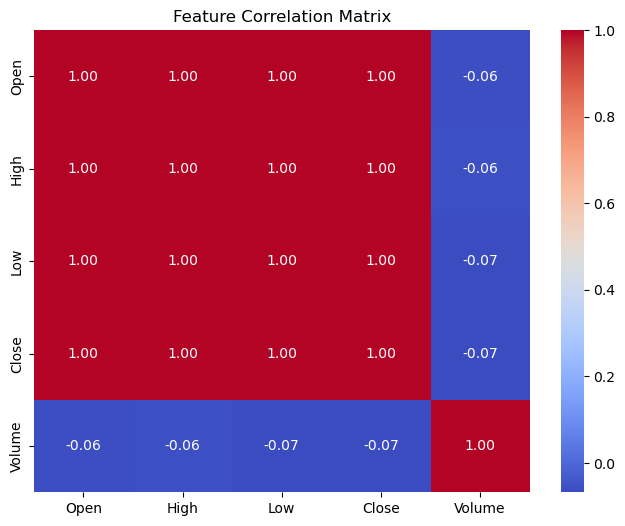

In [4]:
## Data Visualization

# Plot closing price trend
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# Plot volume trends
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], label='Trading Volume', color='orange')
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [5]:
# Feature Engineering

# Create moving averages
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA21'] = df['Close'].rolling(window=21).mean()

# Create volatility measures
df['Return'] = df['Close'].pct_change()
df['Volatility'] = df['Return'].rolling(window=7).std()

# Lag Features
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag7'] = df['Close'].shift(7)

# Display first few rows with new features
print(df.head())


             Open   High    Low  Close   Volume  MA7  MA21    Return  \
Date                                                                   
2022-01-03  38.00  38.65  37.80  38.15  9414200  NaN   NaN       NaN   
2022-01-04  38.75  39.50  38.65  39.05  4115300  NaN   NaN  0.023591   
2022-01-05  39.00  40.00  39.00  39.55  6747300  NaN   NaN  0.012804   
2022-01-06  40.00  40.10  39.55  40.00  5136500  NaN   NaN  0.011378   
2022-01-07  40.00  40.00  38.90  39.90  4576700  NaN   NaN -0.002500   

            Volatility  Close_Lag1  Close_Lag7  
Date                                            
2022-01-03         NaN         NaN         NaN  
2022-01-04         NaN       38.15         NaN  
2022-01-05         NaN       39.05         NaN  
2022-01-06         NaN       39.55         NaN  
2022-01-07         NaN       40.00         NaN  


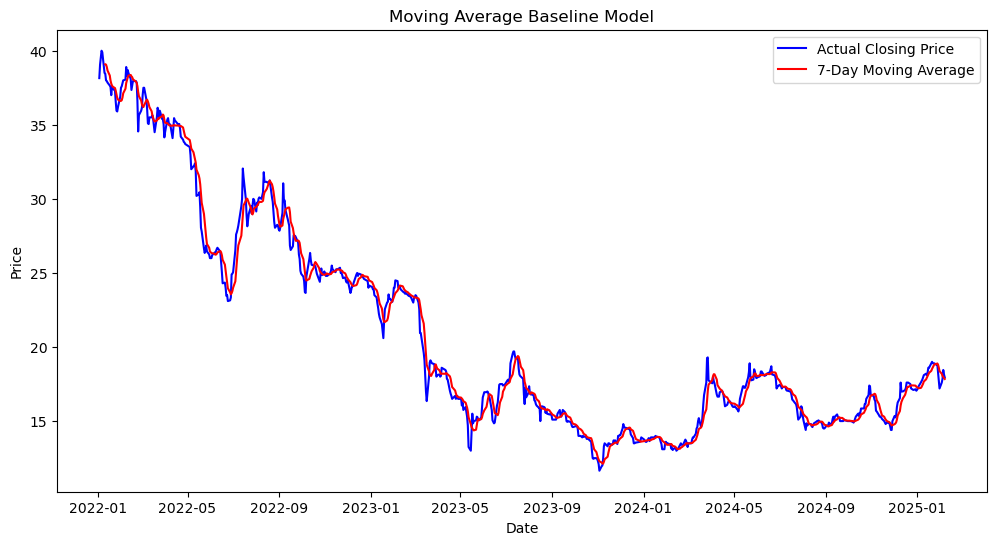

In [6]:
## Moving Average Baseline Model

# Plot Moving Average (7-day)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual Closing Price', color='blue')
plt.plot(df.index, df['MA7'], label='7-Day Moving Average', color='red')
plt.title("Moving Average Baseline Model")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


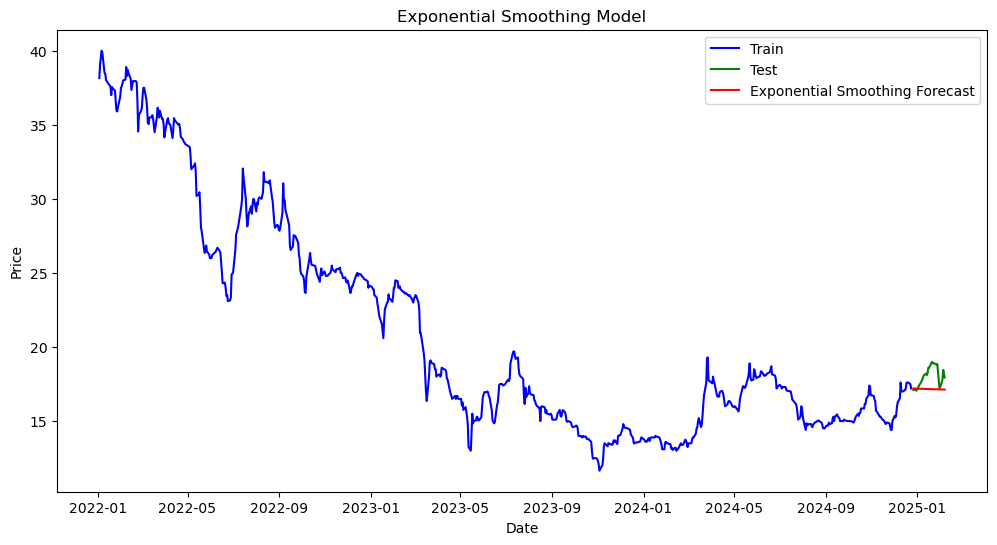

In [7]:
## Exponential Smoothing Model
## This step fixes the import issue and applies exponential smoothing for forecasting.

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Split data into training and testing sets
train = df['Close'][:-30]
test = df['Close'][-30:]

# Fit Exponential Smoothing Model
model = ExponentialSmoothing(train, trend='add', seasonal=None, damped_trend=True)
fit_model = model.fit()
predictions = fit_model.forecast(len(test))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='green')
plt.plot(test.index, predictions, label='Exponential Smoothing Forecast', color='red')
plt.title("Exponential Smoothing Model")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [8]:
##  ARIMA Model for Time Series Forecasting
## The ARIMA (AutoRegressive Integrated Moving Average) model is one of the most powerful traditional time series forecasting techniques.

##Import dependencies

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import warnings

warnings.filterwarnings("ignore")


In [9]:
##  Check for Stationarity (ADF Test)
## Before applying ARIMA, we need to check if the time series is stationary (i.e., no trend or seasonality).

# Perform Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("Data is stationary.")
    else:
        print("Data is NOT stationary. Differentiation needed.")

# Check stationarity of 'Close' price
adf_test(df['Close'])


ADF Statistic: -2.632706167211485
p-value: 0.08642419633118603
Data is NOT stationary. Differentiation needed.


In [10]:
## Apply differencing

df['Close_Diff'] = df['Close'].diff().dropna()

# Check stationarity after differencing
adf_test(df['Close_Diff'].dropna())


ADF Statistic: -17.839869889507707
p-value: 3.109237891143848e-30
Data is stationary.


In [11]:
##Fit Arima Model

from pmdarima import auto_arima

# Automatically determine the best ARIMA (p, d, q) parameters
stepwise_fit = auto_arima(df['Close'], seasonal=False, trace=True, suppress_warnings=True)
print(stepwise_fit.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=857.856, Time=1.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=906.091, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=854.767, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=853.603, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=906.890, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=854.890, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=854.721, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=856.258, Time=0.69 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=853.449, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=854.615, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=854.436, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=854.365, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=856.003, Time=0.59 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 4.887 seconds
                               SARI

In [12]:
## Train ARIMA Model

# Fit ARIMA model with chosen parameters (replace with values from auto_arima output)
p, d, q = stepwise_fit.order
model_arima = sm.tsa.ARIMA(df['Close'], order=(p, d, q))
model_fit = model_arima.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  769
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -424.725
Date:                Mon, 10 Feb 2025   AIC                            853.449
Time:                        02:37:10   BIC                            862.737
Sample:                             0   HQIC                           857.024
                                - 769                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2647      0.023     11.384      0.000       0.219       0.310
sigma2         0.1769      0.005     32.548      0.000       0.166       0.188
Ljung-Box (L1) (Q):                   0.03   Jarque-

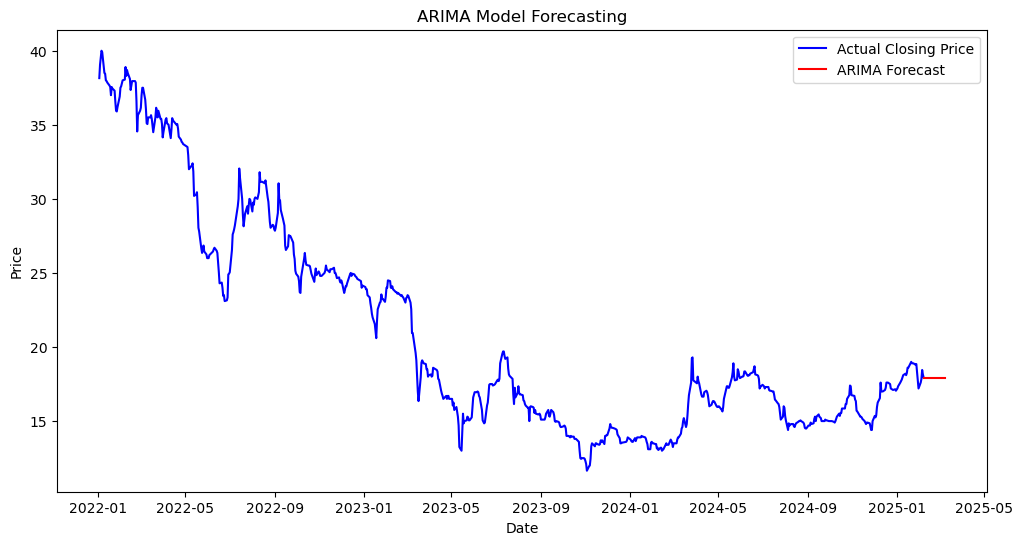

In [13]:
## Make predictions

# Forecast 30 days into the future
forecast = model_fit.forecast(steps=30)

# Plot actual vs. forecasted prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual Closing Price', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), forecast, label='ARIMA Forecast', color='red')
plt.title("ARIMA Model Forecasting")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [16]:
## LSTM (Long Short-Term Memory) for Time Series Forecasting
## LSTM is a deep learning model designed to capture long-term dependencies in time series data. It performs well in sequential data prediction.

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [17]:
## Data preprocessing for LSTM

# Normalize the 'Close' price for better LSTM performance
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close_Scaled'] = scaler.fit_transform(df[['Close']])

# Create sequences for LSTM (Using past 30 days to predict next day)
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Prepare LSTM dataset
sequence_length = 30
X, y = create_sequences(df['Close_Scaled'].values, sequence_length)

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("Train Shape:", X_train.shape, y_train.shape)
print("Test Shape:", X_test.shape, y_test.shape)


Train Shape: (591, 30, 1) (591,)
Test Shape: (148, 30, 1) (148,)


In [18]:
## Build LSTM model

# Define LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(sequence_length, 1)),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display model architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0517 - val_loss: 0.0010
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0053 - val_loss: 9.7906e-04
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0036 - val_loss: 8.3516e-04
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0036 - val_loss: 7.5505e-04
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0031 - val_loss: 7.4105e-04
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0031 - val_loss: 6.6074e-04
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0030 - val_loss: 6.2913e-04
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0030 - val_loss: 6.0423e-04
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0026 - val_loss: 5.3457e-04
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0020 - val_loss: 5.8147e-04
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0021 - val_loss: 4.6861e-04
Epoch 12/50
37/37 ━━━━━

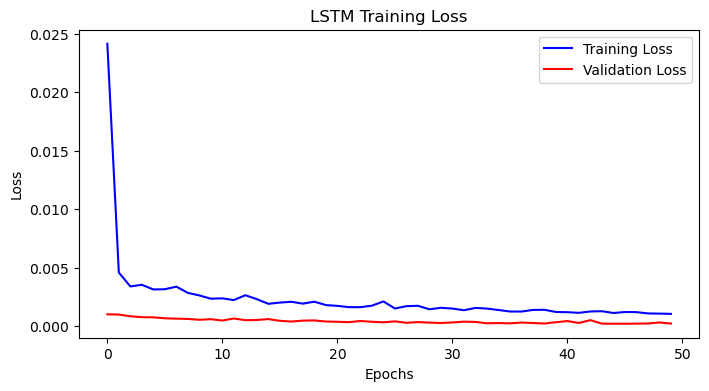

In [19]:
## Train LSTM Model

# Train the LSTM model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Plot training loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title("LSTM Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step


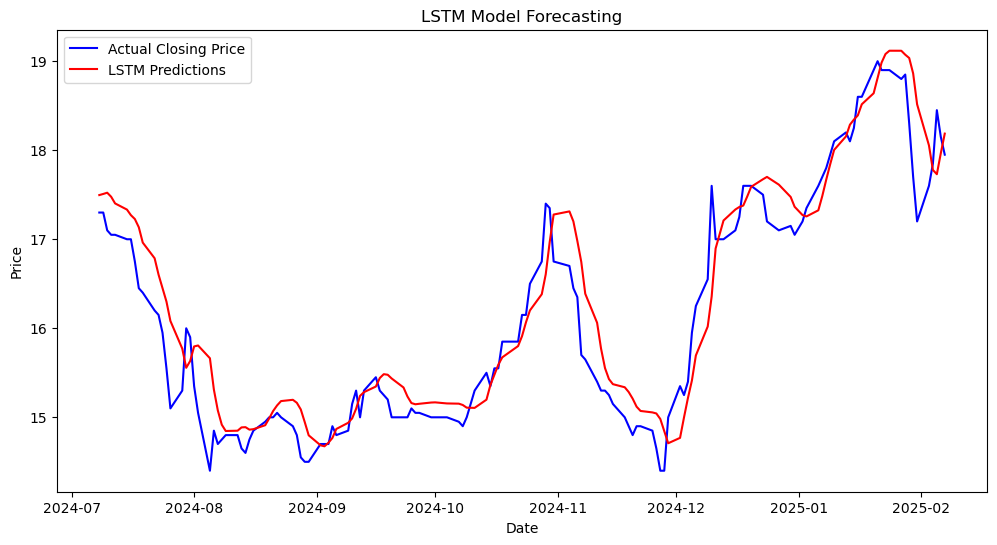

In [20]:
## Make predictions and inverse scale

# Make predictions
predictions = model.predict(X_test)

# Inverse scale predictions
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test_rescaled, label='Actual Closing Price', color='blue')
plt.plot(df.index[-len(y_test):], predictions_rescaled, label='LSTM Predictions', color='red')
plt.title("LSTM Model Forecasting")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━

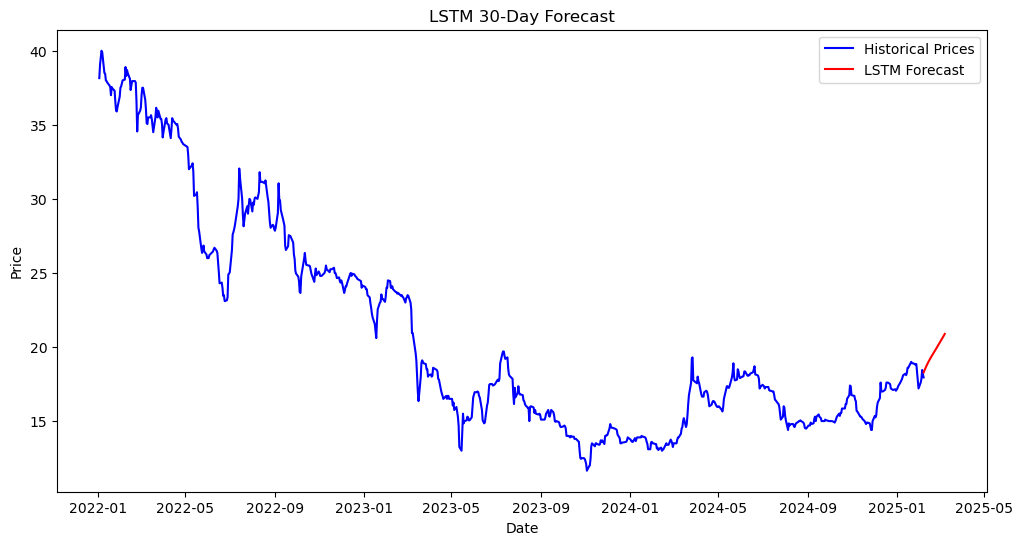

In [21]:
 ## Forecast Future Prices (Next 30 Days)

# Use last 30 days of data for future predictions
future_input = df['Close_Scaled'].values[-sequence_length:].reshape(1, sequence_length, 1)

# Forecast 30 days ahead
future_predictions = []
for _ in range(30):
    pred = model.predict(future_input)
    future_predictions.append(pred[0][0])
    future_input = np.append(future_input[:, 1:, :], [[[pred[0][0]]]], axis=1)

# Inverse transform future predictions
future_predictions_rescaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot forecasted prices
future_dates = pd.date_range(df.index[-1], periods=30, freq='D')
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Historical Prices', color='blue')
plt.plot(future_dates, future_predictions_rescaled, label='LSTM Forecast', color='red')
plt.title("LSTM 30-Day Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [22]:
## Visualization 

## Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [23]:
## Load the data

df = pd.read_csv("HistoricalPrices.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Display first few rows
df.head()


,Open,High,Low,Close,Volume
Date,,,,,
2025-02-07,18.25,18.25,17.8,17.95,9991800
2025-02-06,18.25,18.50,18.0,18.15,11395300
2025-02-05,18.00,18.80,18.0,18.45,15718800
2025-02-04,17.80,18.40,17.5,17.85,14123100
2025-02-03,17.30,17.80,17.2,17.60,6685600


In [27]:
df.columns = df.columns.str.strip()  # Remove extra spaces

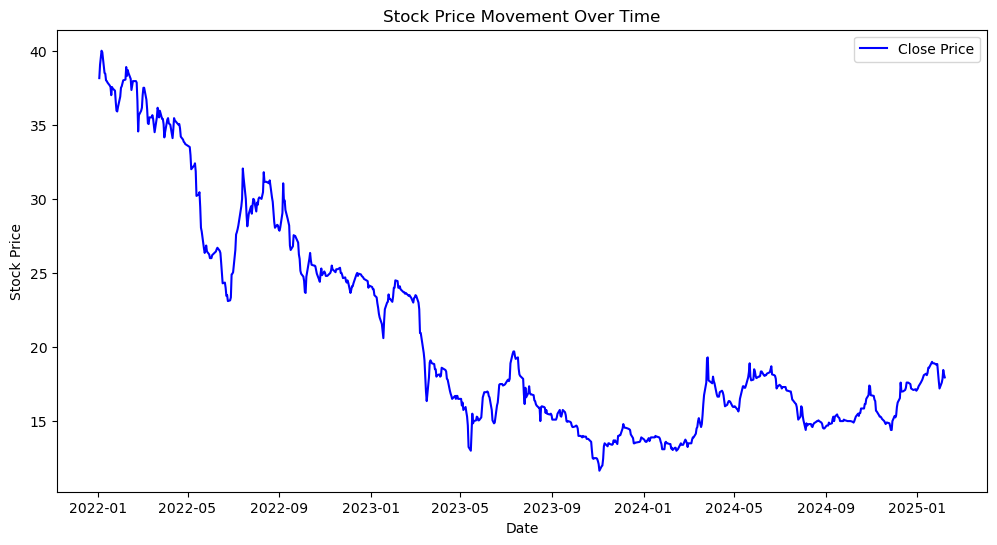

In [28]:
## Plot historical stock prices

plt.figure(figsize=(12,6))
plt.plot(df.index, df["Close"], label="Close Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Movement Over Time")
plt.legend()
plt.show()


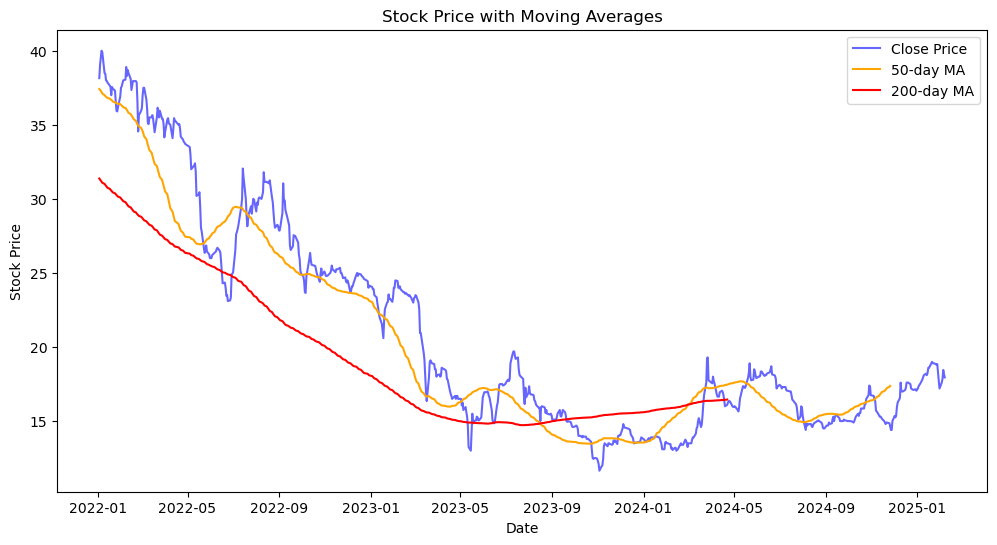

In [29]:
## Visualizing moving averages

df["50_MA"] = df["Close"].rolling(window=50).mean()
df["200_MA"] = df["Close"].rolling(window=200).mean()

plt.figure(figsize=(12,6))
plt.plot(df.index, df["Close"], label="Close Price", color="blue", alpha=0.6)
plt.plot(df.index, df["50_MA"], label="50-day MA", color="orange")
plt.plot(df.index, df["200_MA"], label="200-day MA", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price with Moving Averages")
plt.legend()
plt.show()


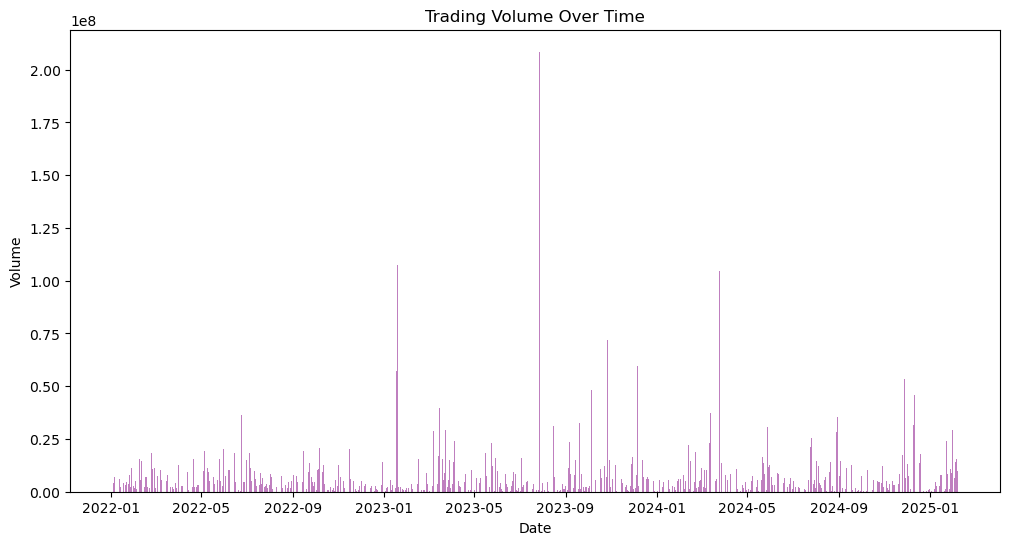

In [30]:
## Volume traded over time
plt.figure(figsize=(12,6))
plt.bar(df.index, df["Volume"], color="purple", alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Trading Volume Over Time")
plt.show()


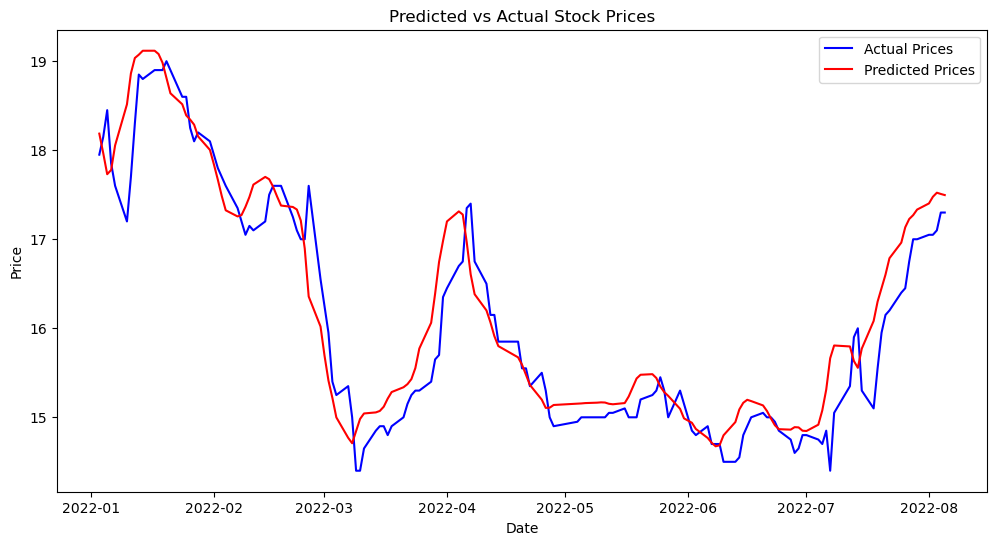

In [31]:
## Forecasted vs Actual Prices (From ARIMA or LSTM)

plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test):], y_test_rescaled, label='Actual Prices', color='blue')
plt.plot(df.index[-len(y_test):], predictions_rescaled, label='Predicted Prices', color='red')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Predicted vs Actual Stock Prices")
plt.legend()
plt.show()


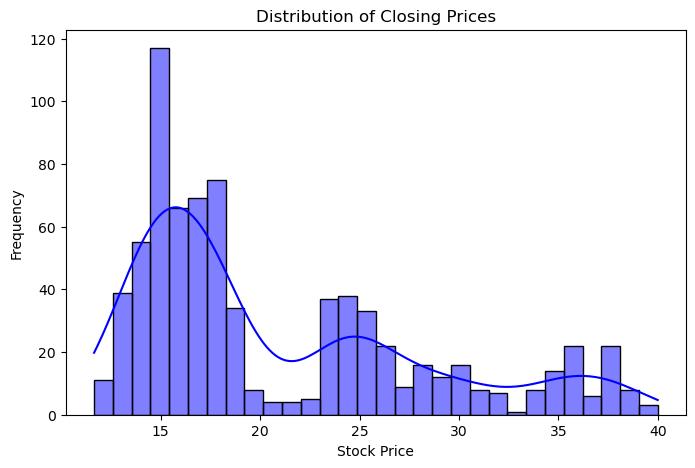

In [32]:
## Distribution of closing prices

plt.figure(figsize=(8,5))
sns.histplot(df["Close"], bins=30, kde=True, color="blue")
plt.title("Distribution of Closing Prices")
plt.xlabel("Stock Price")
plt.ylabel("Frequency")
plt.show()


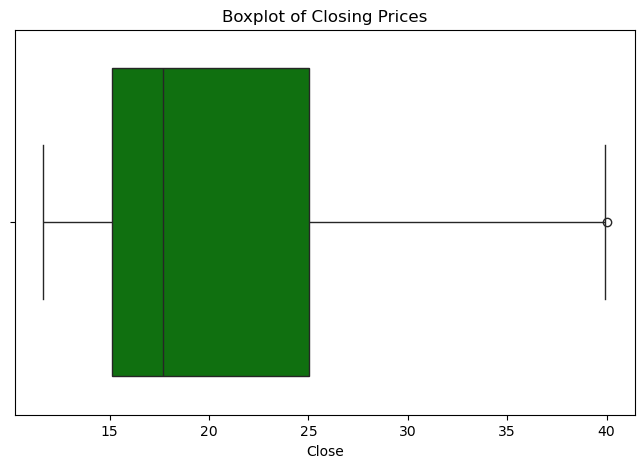

In [33]:
## Boxplot for Outlier Detection

plt.figure(figsize=(8,5))
sns.boxplot(x=df["Close"], color="green")
plt.title("Boxplot of Closing Prices")
plt.show()


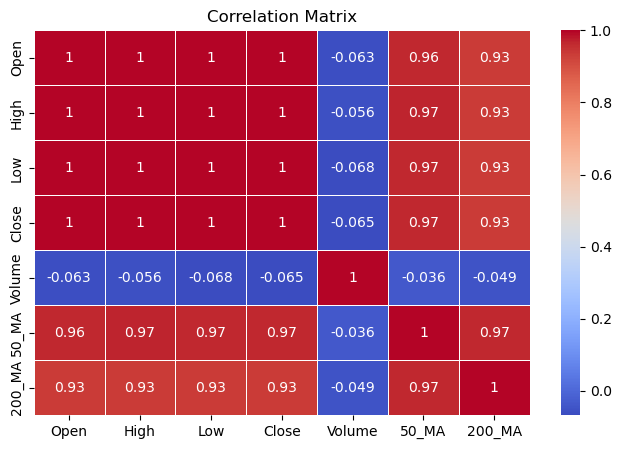

In [34]:
## Correlation Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [37]:
import pickle  

# Save ARIMA model
with open("arima_model.pkl", "wb") as arima_file:
    pickle.dump(model_fit, arima_file)  # Use 'model_fit' for ARIMA

# Save LSTM model
with open("lstm_model.pkl", "wb") as lstm_file:
    pickle.dump(model, lstm_file)  # Use 'model' for LSTM

print("✅ Models saved successfully: arima_model.pkl & lstm_model.pkl")



✅ Models saved successfully: arima_model.pkl & lstm_model.pkl
